In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# # select device
# device = 'cpu'#torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("device: %s" % device)

In [34]:
import matplotlib.pyplot as plt
from PIL import Image

import json
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset

from FOD.Trainer import Trainer
from FOD.dataset import AutoFocusDataset

In [41]:
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = transforms.ToPILImage()(img.to('cpu').float())
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.show()


In [42]:
with open('config.json', 'r') as f:
    config = json.load(f)

np.random.seed(config['General']['seed'])
list_data = config['Dataset']['paths']['list_datasets']

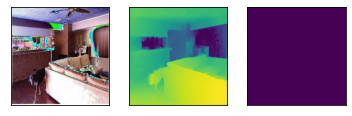

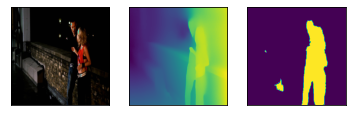

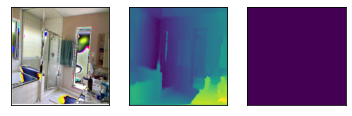

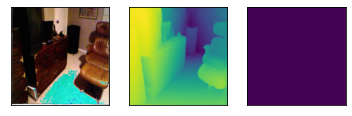

In [56]:
## train set
autofocus_datasets_train = []
for dataset_name in list_data:
    autofocus_datasets_train.append(AutoFocusDataset(config, dataset_name, 'train'))
train_data = ConcatDataset(autofocus_datasets_train)
train_dataloader = DataLoader(train_data, batch_size=config['General']['batch_size'], shuffle=True)

imgs, ds, ss = next(iter(train_dataloader))
show([imgs[0], ds[0], ss[0]])
show([imgs[1], ds[1], ss[1]])
show([imgs[2], ds[2], ss[2]])
show([imgs[3], ds[3], ss[3]])

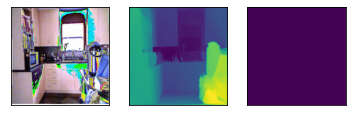

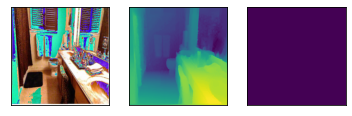

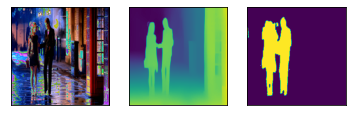

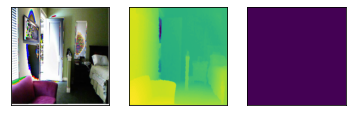

In [66]:
autofocus_datasets_val = []
for dataset_name in list_data:
    autofocus_datasets_val.append(AutoFocusDataset(config, dataset_name, 'val'))
val_data = ConcatDataset(autofocus_datasets_val)
val_dataloader = DataLoader(val_data, batch_size=config['General']['batch_size'], shuffle=True)

imgs, ds, ss = next(iter(val_dataloader))
show([imgs[0], ds[0], ss[0]])
show([imgs[1], ds[1], ss[1]])
show([imgs[2], ds[2], ss[2]])
show([imgs[3], ds[3], ss[3]])

In [37]:
import cv2
import os, glob

In [53]:
for imgpath in glob.glob("./datasets/nyuv2/depths/*.jpg"):
    img = cv2.imread(imgpath)
    img = (img - img.min()) / (img.max() - img.min())
    img = 1-img
    img *= 255
    img = img.astype("uint8")
    newpath = "./datasets/nyuv2/depthsinv/"+os.path.basename(imgpath)
    cv2.imwrite(newpath, img)

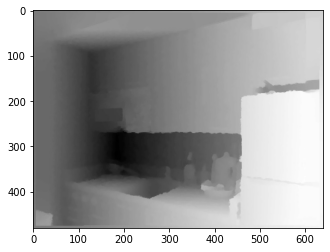

In [47]:
img = cv2.imread("./datasets/nyuv2/depths/1.jpg").astype("float32")
img2 = (img - img.min()) / (img.max() - img.min())
img2 = 1-img2
img2 *= 255
img2 = img2.astype("uint8")
plt.imshow(img2)

In [15]:
!python train.py

device: cpu
epoch 1 : loss =  0.2676319032907486
epoch 2 : loss =  0.2364957183599472
epoch 3 : loss =  0.21266299486160278
epoch 4 : loss =  0.2023397758603096
epoch 5 : loss =  0.20164500176906586
Finished Training



0it [00:00, ?it/s]
1it [00:03,  3.92s/it]
2it [00:06,  3.64s/it]
2it [00:06,  3.46s/it]

0it [00:00, ?it/s]
1it [00:03,  3.87s/it]
2it [00:06,  3.59s/it]
2it [00:06,  3.41s/it]

0it [00:00, ?it/s]
1it [00:03,  3.90s/it]
2it [00:06,  3.63s/it]
2it [00:06,  3.45s/it]

0it [00:00, ?it/s]
1it [00:03,  3.92s/it]
2it [00:06,  3.64s/it]
2it [00:06,  3.45s/it]

0it [00:00, ?it/s]
1it [00:04,  4.66s/it]
2it [00:08,  4.48s/it]
2it [00:08,  4.35s/it]


device: cpu
epoch 1 : loss =  0.5203628614544868
epoch 2 : loss =  0.7942679226398468
epoch 3 : loss =  0.7929099649190903
epoch 4 : loss =  0.7928613126277924
epoch 5 : loss =  0.7501863390207291
Finished Training



0it [00:00, ?it/s]
1it [00:03,  3.06s/it]
2it [00:06,  3.05s/it]
3it [00:08,  2.88s/it]
4it [00:09,  2.36s/it]
4it [00:09,  2.43s/it]

0it [00:00, ?it/s]
1it [00:02,  2.06s/it]
2it [00:04,  2.06s/it]
3it [00:06,  2.07s/it]
4it [00:07,  1.79s/it]
4it [00:07,  1.83s/it]

0it [00:00, ?it/s]
1it [00:02,  2.07s/it]
2it [00:04,  2.06s/it]
3it [00:06,  2.06s/it]
4it [00:07,  1.77s/it]
4it [00:07,  1.81s/it]

0it [00:00, ?it/s]
1it [00:02,  2.04s/it]
2it [00:04,  2.05s/it]
3it [00:06,  2.06s/it]
4it [00:07,  1.79s/it]
4it [00:07,  1.84s/it]

0it [00:00, ?it/s]
1it [00:02,  2.10s/it]
2it [00:04,  2.09s/it]
3it [00:06,  2.08s/it]
4it [00:07,  1.80s/it]
4it [00:07,  1.84s/it]


In [3]:
# model = FocusOnDepth((3,384,384), patch_size=16, emb_dim=512, resample_dim=256, read="projection", nhead=8)
# model.to(device)
# total_params = sum(p.numel() for p in model.parameters())
# total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(total_params, total_trainable_params)

In [4]:
# model.eval()
# img = torch.Tensor(np.random.random((5,3,384,384))).to(device)
# out = model(img)
# plt.imshow(out[0].permute(1,2,0).squeeze(-1).detach())
# plt.show()

In [5]:
# train_dataset = torchvision.datasets.ImageFolder(root="./datasets/inria/frames/1/",
#                                      transform=None)

# train_dataloader = torch.utils.data.DataLoader(train_dataset,
#                                           batch_size=4,
#                                           shuffle=True, 
#                                           num_workers=2)

In [6]:
# #Validation des rearrange
# tmp = np.array([[1,2,3],[4,5,6],[7,8,9]])
# tmp = np.concatenate([np.concatenate([tmp] * 128, axis=1)]*128)
# tmp = np.stack([tmp,tmp,tmp], axis=0)
# tmp = np.array([tmp])
# tmp = torch.Tensor(tmp)
# tmp.shape

# topatch = Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=3, p2=3)
# tmp2 = topatch(tmp)
# tmp2 = torch.Tensor(tmp2)
# print(tmp2.shape)
# plt.imshow(tmp2[0], aspect='auto')
# plt.colorbar()
# plt.show()

# concat = Rearrange('b (h w) c -> b c h w', c=27, h=(384 // 3), w=(384 // 3))
# tmp3 = concat(tmp2)
# tmp3 = torch.Tensor(tmp3)
# print(tmp3.shape)
# tmp3[0,:4]